<a href="https://colab.research.google.com/github/GitSantiagopf/DiabetesPrediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Not have a missing values

In [6]:
#Create a class for scatter plot visualization.
class ScatterPlot:
    def __init__(self, x_data, y_data, color):
        self.x_data = x_data
        self.y_data = y_data
        self.color = color

    def create_plot(self, title, x_label, y_label):
        plt.scatter(x=self.x_data, y=self.y_data, color=self.color)
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(axis='both', alpha=0.75)
        plt.show()

#Create a class for hist plot visualization

class HistPlot:
    def __init__(self, x_data):
        self.x_data = x_data

    def create_plot(self, title, x_label, y_label):
        plt.figure(figsize = (8,4))
        plt.hist(x=self.x_data, linewidth = 2, edgecolor = 'black')
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(axis='both', alpha=0.75)
        plt.show()

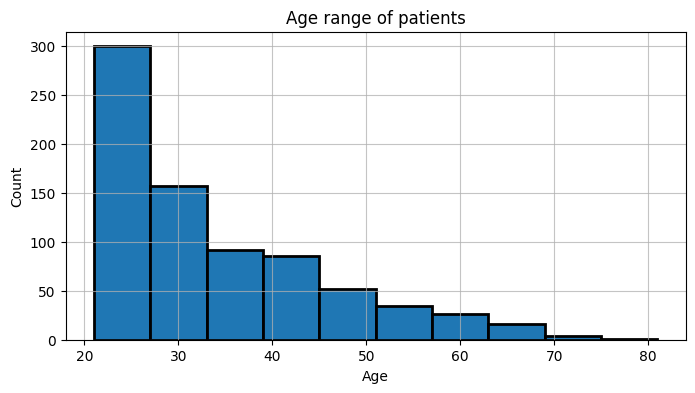

In [7]:
agerange = HistPlot(df['Age'])
agerange.create_plot('Age range of patients', 'Age', 'Count')

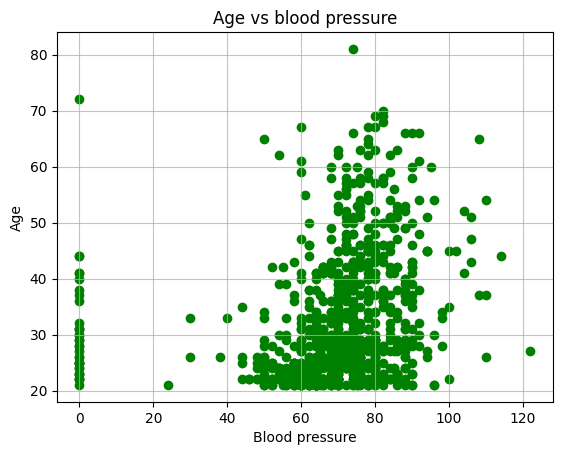

In [8]:
agevsblood = ScatterPlot(df['BloodPressure'], df['Age'], 'green')
agevsblood.create_plot('Age vs blood pressure', 'Blood pressure', 'Age')

Blood pressure 0 is not possible

In [30]:
data = df
print("Patients with blood pressure\n", data.shape) # Rows x Columns

Patients with blood pressure
 (768, 9)


In [12]:
#Separate the dataset
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]

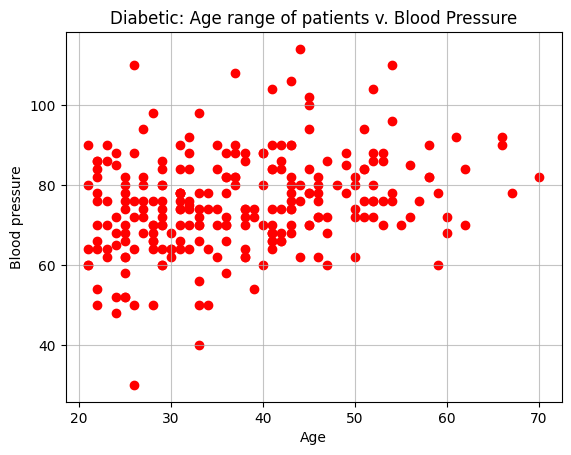

In [13]:
Diabeticagerange = ScatterPlot(diabetic['Age'], diabetic['BloodPressure'], 'red')
Diabeticagerange.create_plot('Diabetic: Age range of patients v. Blood Pressure','Age' , 'Blood pressure') 

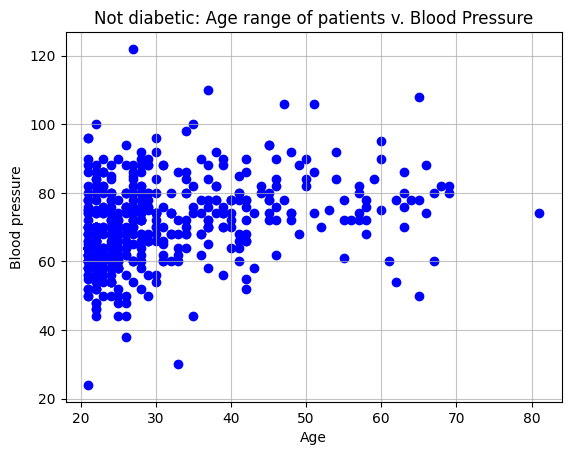

In [15]:
Notdiabeticagerange = ScatterPlot(notdiabetic['Age'], notdiabetic['BloodPressure'], 'blue')
Notdiabeticagerange.create_plot('Not diabetic: Age range of patients v. Blood Pressure','Age' , 'Blood pressure')

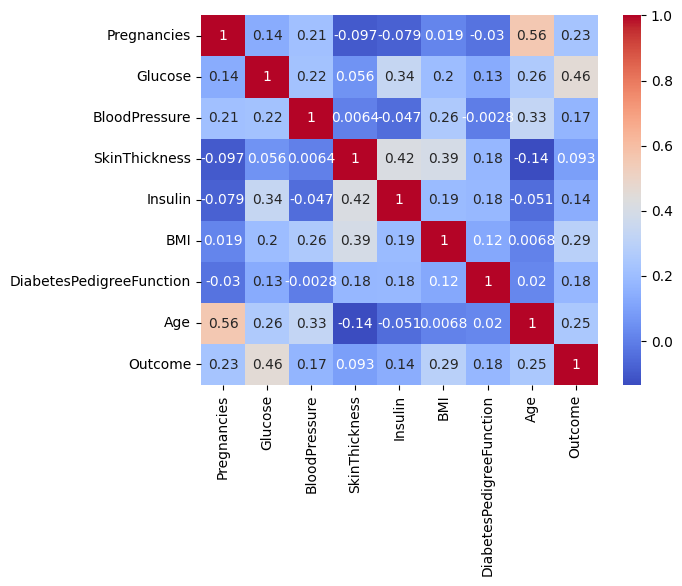

In [11]:
# Visualize correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Create ML model



In [136]:
# Create a StandardScaler object
scaler = MinMaxScaler()

# Split into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [115]:
X_train

array([[0.11764706, 0.42211055, 0.        , ..., 0.        , 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.67213115, ..., 0.42026826, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.37704918, ..., 0.42771982, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [137]:
# Set the hyperparameter grid
param_gridLR = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 10, 100],
}

# Create logistic regression model
logreg = LogisticRegression(max_iter = 500, solver='liblinear')

# Create GridSearchCV object
grid_searchLR = GridSearchCV(logreg, param_grid=param_gridLR, cv=5)

# Fit the GridSearchCV object to the training data
grid_searchLR.fit(X_train, y_train)

# Evaluate the best model on the test data
score = grid_searchLR.score(X_test, y_test)

predictions = grid_searchLR.best_estimator_.predict(X_test)

print(predictions)
print(f'Best parameters: {grid_searchLR.best_params_}')
print(f'Test accuracy: {score: .3f}')

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]
Best parameters: {'C': 100, 'penalty': 'l1'}
Test accuracy:  0.753


In [138]:
# Create RidgeClassifier model
ridge_clf = RidgeClassifier()

ridge_clf.fit(X_train, y_train)

y_pred = ridge_clf.predict(X_test)

# Evaluate the best model on the test data
scoreRC = accuracy_score(y_test,y_pred)

print(f'Test accuracy: {scoreRC: .3}')

Test accuracy:  0.753


In [139]:
Kneigh = KNeighborsClassifier(n_neighbors=65)

Kneigh.fit(X_train, y_train)

y_pred = Kneigh.predict(X_test)

scoreKN = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {scoreKN: .3}')

Test accuracy:  0.76


In [140]:
treemodel = DecisionTreeClassifier()

treemodel.fit(X_train, y_train)

scoretree = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {scoretree:.3f}')

Test accuracy: 0.760


In [141]:
randomforest = RandomForestClassifier()

randomforest.fit(X_train, y_train)

scorerandom = accuracy_score(y_test, y_pred)

print(f'test accuracy: {scorerandom:.3f}')

test accuracy: 0.760
